# AVIRIS-NG Surface Spectral Reflectance
Lessons learned working with the NSIDC dataset.  
__Dataset__: SnowEx 2021; Senator Beck Basin and Grand Mesa  
__Tutorial Author__: [Brent Wilder](https://github.com/brentwilder)

```{admonition} Learning Objectives
- Understand how this data is structured
- Understand where to find necessary terrain and illumination data
- Learn about the `spectral` python package and apply it to this dataset
```

## Computing environment

We'll be using the following open source Python libraries in this notebook:

In [1]:
!pip install spectral
from spectral import *
import numpy as np
import matplotlib.pyplot as plt

  Using cached spectral-0.23.1-py3-none-any.whl.metadata (1.3 kB)
Using cached spectral-0.23.1-py3-none-any.whl (212 kB)


## SnowEx21 Spectral Reflectance Dataset

The data were collected using an airborne imaging spectrometer, AVIRIS-NG can be downloaded from here, https://nsidc.org/data/snex21_ssr/versions/1.
- Reflectance is provided at 5 nm spectral resolution with a range of 380-2500 nm

- For this dataset, the pixel resolution is 4 m

- Data span from 19 March 2021 to 29 April 2021, and were collected in two snow-covered environments in Colorado: Senator Beck Basin and Grand Mesa

- Each file will have a "__.img__" and "__.hdr__". You need to have both of these in the same directory to open data.

<p align="center">
  <img src="https://avirisng.jpl.nasa.gov/img/rmotc_large.png" />
</p>




## Downloading necessary terrain and illumination data

The NSIDC repository does not contain the terrain/illumination information.

However, you can obtain it for the matching flightline (by its timestamp) at the following URL, https://search.earthdata.nasa.gov/ ,

and searching for __"AVIRIS-NG L1B Calibrated Radiance, Facility Instrument Collection, V1"__ 


- You only need to download the "*obs_ort*" files for the flight of interest. Please note these are different than "*obs*" files (ort means orthorectified).


- In the Granule ID search, you can use wildcars "*" on either end of "obs_ort" to reduce your search.

- You may also want to use this bounding box to reduce your search: 


  - SW: 37.55725,-108.58887


  - NE: 39.78206,-106.16309


## Using python package, `spectral`, to open data

```{important}
Update the paths below to your local environment
```

In [5]:
# INSERT YOUR PATHS HERE
#path_to_aviris = '/data/Albedo/AVIRIS/ang20210429t191025_rfl_v2z1'
#path_to_aviris_hdr = '/data/Albedo/AVIRIS/ang20210429t191025_rfl_v2z1.hdr'
#path_to_terrain = '/data/Albedo/AVIRIS/ang20210429t191025_rfl_v2z1_obs_ort'
#path_to_terrain_hdr = '/data/Albedo/AVIRIS/ang20210429t191025_rfl_v2z1_obs_ort.hdr'

In [2]:
# INSERT YOUR PATHS HERE
path_to_aviris = '/home/jovyan/shared-public/AVIRIS-NG data NASA UW Hackweek FMI Project/AVIRIS-NG-March_2021/SNEX21_SSR_ang20210319t093125_SBB_rfl_v2z1'
path_to_aviris_hdr = '/home/jovyan/shared-public/AVIRIS-NG data NASA UW Hackweek FMI Project/AVIRIS-NG-March_2021/SNEX21_SSR_ang20210319t093125_SBB_rfl_v2z1.hdr'
path_to_terrain = '/home/jovyan/shared-public/AVIRIS-NG data NASA UW Hackweek FMI Project/AVIRIS-NG-March_2021/ang20210319t093125_rdn_v2z1_obs_ort.bin'
path_to_terrain_hdr = '/home/jovyan/shared-public/AVIRIS-NG data NASA UW Hackweek FMI Project/AVIRIS-NG-March_2021/ang20210319t093125_rdn_v2z1_obs_ort.hdr'


In [3]:
# Open a test image
aviris = envi.open(path_to_aviris_hdr)

# Save to an array in memory
rfl_array = aviris.open_memmap(writeable=True)

# print shape. You can see here we have 425 spectral bands for a grid of 1848x699 pixels
rfl_array.shape


(1666, 634, 425)

In [4]:
# You can create an array of the bands centers like this
bands = np.array(aviris.bands.centers)
bands

array([ 377.071821,  382.081821,  387.091821,  392.101821,  397.101821,
        402.111821,  407.121821,  412.131821,  417.141821,  422.151821,
        427.161821,  432.171821,  437.171821,  442.181821,  447.191821,
        452.201821,  457.211821,  462.221821,  467.231821,  472.231821,
        477.241821,  482.251821,  487.261821,  492.271821,  497.281821,
        502.291821,  507.301821,  512.301821,  517.311821,  522.321821,
        527.331821,  532.341821,  537.351821,  542.361821,  547.361821,
        552.371821,  557.381821,  562.391821,  567.401821,  572.411821,
        577.421821,  582.431821,  587.431821,  592.441821,  597.451821,
        602.461821,  607.471821,  612.481821,  617.491821,  622.491821,
        627.501821,  632.511821,  637.521821,  642.531821,  647.541821,
        652.551821,  657.561821,  662.561821,  667.571821,  672.581821,
        677.591821,  682.601821,  687.611821,  692.621821,  697.621821,
        702.631821,  707.641821,  712.651821,  717.661821,  722.

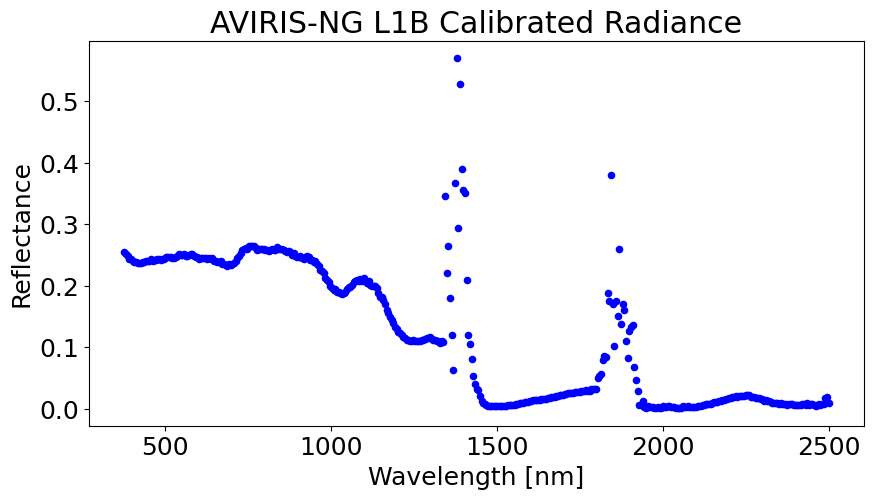

In [7]:
# A simple data visalization by selecting random indices
i = 900
j = 300
pixel = rfl_array[i,j,:]

fig, ax = plt.subplots(1, 1, figsize=(10,5))
plt.rcParams.update({'font.size': 18})
ax.scatter(bands, pixel, color='blue', s=20)
plt.title('AVIRIS-NG L1B Calibrated Radiance')
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Reflectance')
plt.show()
#plt.savefig('shared-public/NASA-UW-Hackweek-2024-FMI-Project/Figures/AVIRIS-NG/Reflectance_vs_wavelength_March_19_2021.png', bbox_inches='tight')

## References

To further explore these topics:

* https://snowex-2022.hackweek.io/tutorials/aviris-ng/AVIRIS-NG_Tutorial.html

* https://www.spectralpython.net/#documentation

## Introduction to Spectral Feature Fitting 

Now that we know how to access and explore hyperspectral data, we can take advantage of the detailed spectral signature to better understand the surface characteristics. For instance, using the Spectral Feature Fitting method, we can compare the absorption features within the image spectra to a reference spectra in order to identify the presence of a specific material within a given pixel. Here, we will demonstrate this using the ice absorption feature in a snow-covered pixel found within Swamp Angel Study Plot. 

To do so, we will follow the principles of the Beer-Lambert equation, which assumes one-way transmittance through a homogeneous medium: 

$$E_\lambda = E_{0\lambda} e^{-\alpha_\lambda d}$$ 

where $E_{0\lambda}$ and $E_\lambda$ are the initial and measured spectral irradiance, respectively, $\alpha_\lambda$ is a wavelength-specific absorption coefficient, and $d$ is the distance (i.e. thickness) that absorption occurs over. This will allow us to estimate an “equivalent thickness” of ice in a pixel.

### Load the reference spectra

First, we'll start by loading the reference spectra. This table provides the simple refractive index ($n_\lambda$) and the extinction coefficient ($k_\lambda$) for water and ice between 400 and 2500 nm. 

In [8]:
import urllib.request

In [9]:
ref_spectra_fname = 'data/h2o_indices.csv'
urllib.request.urlretrieve(
    'https://raw.githubusercontent.com/snowex-hackweek/tutorial-data/main/SnowEx-2022/AVIRIS-NG/h2o_indices.csv',
    ref_spectra_fname
);

FileNotFoundError: [Errno 2] No such file or directory: 'data/h2o_indices.csv'

In [19]:
# Read the file into a numpy array
ref_spectra = np.loadtxt(ref_spectra_fname, delimiter=",", skiprows=1)  # Skip the header row

# Let's take a look at the dimensions of our new array and print out the first few and last few lines.
print(ref_spectra.shape)
ref_spectra

(421, 5)


array([[4.00000000e+02, 1.33810000e+00, 1.90000000e-09, 1.31940000e+00,
        2.71000000e-09],
       [4.05000000e+02, 1.33800000e+00, 1.72000000e-09, 1.31900000e+00,
        2.62000000e-09],
       [4.10000000e+02, 1.33790000e+00, 1.59000000e-09, 1.31850000e+00,
        2.51000000e-09],
       ...,
       [2.49000000e+03, 1.26440000e+00, 1.81000000e-03, 1.22760000e+00,
        9.11000000e-04],
       [2.49500000e+03, 1.26402000e+00, 1.86000000e-03, 1.22670000e+00,
        9.19000000e-04],
       [2.50000000e+03, 1.26365556e+00, 1.90000000e-03, 1.22580000e+00,
        9.25000000e-04]])

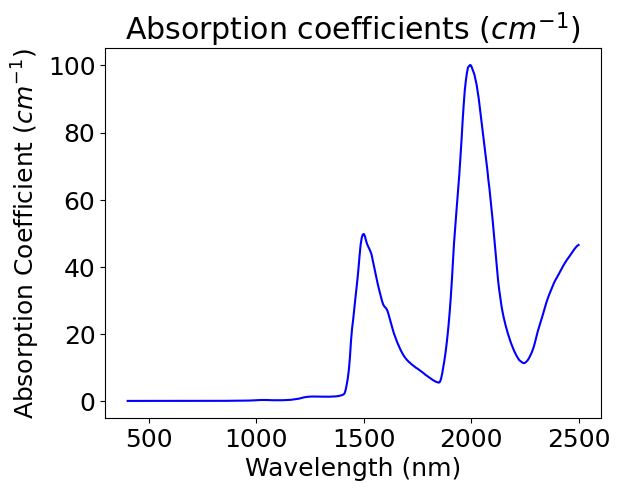

In [60]:
import math 
# Extract columns from array
wvl_nm_fullres = ref_spectra[:, 0] # extract the wavelength column
wvl_cm_fullres = wvl_nm_fullres / 1e9 * 1e2  # convert wavelength from nm to cm
ice_k = ref_spectra[:, 4] # get k for ice

# Calculate absorption coefficients in cm^-1
ice_abs_fullres = ice_k * math.pi * 4.0 / wvl_cm_fullres

# Plot absorption coefficients
plt.plot(wvl_nm_fullres, ice_abs_fullres, color='blue')
plt.title('Absorption coefficients ($cm^{-1}$)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorption Coefficient ($cm^{-1}$)')
plt.savefig('/home/jovyan/shared-public/NASA-UW-Hackweek-2024-FMI-Project/Figures/AVIRIS-NG/Absorption_coefficients_March_19_2021.png', bbox_inches='tight')
plt.show()